<a href="https://colab.research.google.com/github/MatteoBettini/Stock-Market-Prediction-2020/blob/main/notebooks/Data%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Take-home Assessment

## Imports

In [13]:
# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# To make this notebook's output stable across runs
np.random.seed(42)

plt.rcParams['figure.figsize'] = (20.0, 15.0)
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.edgecolor'] = 'white'

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Dataset exploration

In this section we will upload and explore the dataset "**Processed_NASDAQ**",  containing several daily features of NASDAQ Composite from 2010 to 2017. The dataset was acquired from [this repository](https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables#).

It covers features from various categories of technical indicators, future contracts, price of commodities, important indices of markets around the world, price of major companies in the U.S. market, and treasury bill rates. Sources and thorough description of features have been mentioned in the paper "[CNNpred: CNN-based stock market prediction using a diverse set of variables](https://arxiv.org/pdf/1810.08923.pdf)".

## Loading the dataset

In [14]:
nasdaq_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NASDAQ.csv?token=ANHXQQK4VPBE6ABSBCHTF5K74UP3W'
dji_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_DJI.csv?token=ANHXQQOXYQZSSSTVFKX6RZS74XDXA'
nyse_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NYSE.csv?token=ANHXQQNAISMPCLVLRTGNJBC74XD2C'
russel_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_RUSSELL.csv?token=ANHXQQPGLBLSM3B36OLWIPC74XD3U'
s_p_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_S%26P.csv?token=ANHXQQNRFS3NKP2XCF5Q5MS74XD5K'

In [15]:
nasdaq_df = pd.read_csv(nasdaq_url, parse_dates=True)
# Dataset is now stored in a Pandas Dataframe

## Exploring the dataset

Now that we have loaded the dataset we can start inspecting the data.

In [16]:
nasdaq_df.head(10)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,NASDAQ,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.016043,...,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,NASDAQ,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,...,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,NASDAQ,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,...,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,NASDAQ,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,...,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,NASDAQ,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
5,2010-01-08,2317.169922,-0.054915,0.007443,-0.000452,-0.003300,0.000126,2.116212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.15,2.57,3.83,0.001695,-0.003097,5.32,6.32,0.005656,-0.007817,-0.004062,-0.000044,0.006648,0.027077,0.021538,0.003438,-0.002456,0.006897,-0.009269,-0.004012,0.005054,0.001357,0.003032,0.002882,...,0.004249,3.81,3.78,3.68,0.03,0.13,1.00,2.49,6.17,6.27,6.30,-0.062500,-0.067961,-0.019084,NASDAQ,0.88,-0.17,0.53,-0.70,0.11,0.27,0.20,0.66,0.02,0.45,0.06,0.43,0.67,-0.98,1.03,0.61,0.68,0.64,0.35,-0.98,-0.58,-0.56,2.07,1.26,0.38
6,2010-01-11,2312.409912,-0.031463,-0.002054,0.007443,-0.000452,-0.003300,0.172845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.04,0.13,2.58,3.85,-0.002417,0.023297,5.35,6.32,0.005543,-0.006130,0.003884,-0.000147,-0.008822,-0.024041,0.009639,0.000156,-0.003357,-0.012720,-0.002079,0.011220,-0.000507,0.000705,0.000479,0.001747,...,0.003192,3.84,3.81,3.72,0.03,0.12,0.97,2.47,6.19,6.28,6.31,-0.133333,-0.010417,0.003891,NASDAQ,0.76,-0.49,-0.07,1.21,-0.28,-0.12,0.36,0.70,-0.03,1.10,0.84,-

Taking a peak at the first five elements we can already see that there are a lot of missing values. They will be treated accordingly in the section regarding data transofrmations.


We can also see that the dates inculuded in the dataset are referring only to working days as the stock market is open only on those days.

We can get a confirmation of this by looking at the following rows where we see that 16,17 January 2010 are not present because it was a weekend and 18 January 2010 is not present because of the federal U.S. festivity of "Martin Luther King Jr. Day".

This is not a problem for our machine leraning pipeline as we will map the 'Date' feature into a categorical feature representing the day of the week.
More information on this will be provided in the section about data transformation.

In [17]:
nasdaq_df.iloc[9:13]

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
9,2010-01-14,2316.739990,-0.027683,0.003830,0.011212,-0.013017,-0.002054,0.725634,NaN,NaN,NaN,2302.394971,NaN,NaN,NaN,0.02,0.05,0.14,2.51,3.76,-0.003892,0.009758,5.17,6.22,0.002941,-0.001816,-0.007179,0.000029,-0.005792,-0.013632,-0.007724,0.002001,0.009943,0.020099,0.014346,0.000144,0.003727,0.004513,0.004316,0.002426,...,0.002474,3.74,3.71,3.62,0.03,0.12,1.05,2.46,6.08,6.17,6.20,-0.066667,-0.030928,-0.015686,NASDAQ,0.82,-0.63,0.36,-0.35,-0.33,0.33,0.33,-0.06,0.36,0.55,-0.60,1.14,0.31,-2.53,1.59,0.27,0.57,0.76,0.33,0.12,-0.13,-0.16,-1.49,0.32,0.39
10,2010-01-15,2287.989990,0.170174,-0.012410,0.003830,0.011212,-0.013017,-1.259292,0.830271,NaN,NaN,2299.775883,NaN,NaN,NaN,0.03,0.06,0.15,2.44,3.70,-0.017517,-0.009005,5.12,6.18,-0.003921,-0.005665,0.005472,0.000000,-0.016712,-0.001649,-0.015569,-0.008295,-0.022600,-0.003230,-0.031390,-0.008180,-0.015287,-0.007784,-0.018853,-0.010823,...,-0.012315,3.67,3.64,3.55,0.03,0.12,1.06,2.48,6.03,6.12,6.15,0.071429,-0.053191,-0.027888,NASDAQ,-0.94,-0.91,-0.53,-0.62,-1.75,-1.89,-0.94,-0.81,-0.83,-1.09,-0.43,0.38,-1.38,1.84,0.73,-0.55,-1.24,-1.42,-1.14,0.64,0.77,0.77,-3.27,-1.45,-1.08
11,2010-01-19,2320.399902,-0.224614,0.014165,-0.012410,0.003830,0.011212,0.345527,0.518969,NaN,NaN,2303.525705,NaN,NaN,NaN,0.03,0.06,0.14,2.48,3.73,0.013084,0.004433,5.22,6.21,0.005333,0.004948,0.002624,-0.000029,0.044238,0.003697,0.006083,0.012237,-0.009158,0.007777,0.007123,0.002315,0.013982,0.010577,0.017105,0.012500,...,0.011811,3.70,3.67,3.59,0.03,0.11,0.99,2.48,6.07,6.15,6.18,-0.066667,0.044944,0.016393,NASDAQ,-0.17,0.69,0.79,0.50,1.31,0.91,0.59,-0.59,0.35,0.85,0.52,0.16,1.48,-2.35,-0.74,-0.95,0.49,1.54,1.19,0.89,0.58,0.57,-2.08,0.70,0.45
12,2010-01-20,2291.250000,0.149905,-0.012562,0.014165,-0.012410,0.003830,0.391706,-0.756265,NaN,NaN,2301.293759,NaN,NaN,NaN,0.03,0.05,0.14,2.45,3.68,-0.019752,-0.011253,5.24,6.16,-0.003586,-0.000077,0.013085,0.000073,-0.015392,-0.014341,-0.002418,-0.003060,0.002773,-0.016399,-0.016266,-0.017901,-0.020131,-0.016742,-0.020907,-0.010598,...,-0.015295,3.65,3.63,3.54,0.02,0.11,0.92,2.48,6.02,6.11,6.13,0.000000,-0.010753,-0.012097,NASDAQ,-1.73,-1.69,-2.06,-2.65,-1.77,-2.08,-1.06,-1.40,-1.72,-2.40,-2.02,0.00,-1.20,-1.10,-0.46,-1.64,-4.89,-1.30,-1.03,1.05,1.09,1.08,-2.08,-4.69,-2.32


### Features

The datasets described in [the paper](https://arxiv.org/pdf/1810.08923.pdf) contain 1984 entries each representing a day of trading in a stock market. Each entry has 82 features which are grouped in the following way:

*   Primitive features
*   Technical indicators
*   Economic data
*   World stock markets
*   The exchange rate of U.S. dollar
*   Commodities
*   Big U.S. Companies
*   Futures contracts

The authors have made available five datasets, each representing a different stock market. The available markets are: S&P 500, NASDAQ Composite, Dow Jones Industrial Average, RUSSELL 2000, and NYSE Composite. In this work we will explore and analyse the NASDAQ Composite dataset, but all the insights we are going to gain will be valid for all datasets.

The primitive featrues and the technical indicators are unique for each dataset, while all the other features are common among datasets.

A tabular description of the features is also reported in the following images.

<img src="https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/feature_description/feature_table_1.png?token=ANHXQQI7BINXDEPRGLZ42LS74XAH6" width="2000">
<img src="https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/feature_description/feature_table_2.png?token=ANHXQQOG2ZP4BPHXIWXNWWK74XAKY" width="2000">

By looking at the info of the NASDAQ dataset we can see the types of the features and the number of non-null values.

In [18]:
nasdaq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1983 non-null   float64
 3   mom             1983 non-null   float64
 4   mom1            1982 non-null   float64
 5   mom2            1981 non-null   float64
 6   mom3            1980 non-null   float64
 7   ROC_5           1979 non-null   float64
 8   ROC_10          1974 non-null   float64
 9   ROC_15          1969 non-null   float64
 10  ROC_20          1964 non-null   float64
 11  EMA_10          1975 non-null   float64
 12  EMA_20          1965 non-null   float64
 13  EMA_50          1935 non-null   float64
 14  EMA_200         1785 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

If we analyse carefully the features availaible in the actual dataset we may notice a few differences from those described in the paper.

Apart from the fact that the same feature may have a different name in the two descriptions, in the loaded dataset we may find two **new** features:

| # | Feature | Description | Type |
| --- | --- | --- | --- |
| 83 | mom | Return of 1 day before | Technical indicator |
| 84| wheat-F | Relative change of wheat price| Comodity |

The features descriptions and types comes from my best intution, as I could not find any detailed description ot these two features.

In each market's dataset we may also see that there is a featrure indicating the name of the market from where the data comes.



In [19]:
nasdaq_df["Name"].value_counts()

NASDAQ    1984
Name: Name, dtype: int64

Lastly, among the features IXIC, GSPC, DJI, NYSE and RUSSEL, the one referring to the market from where the dataset is from is dropped. This is because the return of such market at time $t$ can be computed from the "Close" feature as $$Return = \frac{Close_{t}}{Close_{t-1}}$$

For example, in our dataset *Processed_NASDAQ* the feature IXIC is not present.

Therefore, we can understand why in our data frame we have 84 columns. This is the result of the addition of "mom", "wheat-F" and "Name" to the 82 features described in the paper after having removed the redundant feature among IXIC, GSPC, DJI, NYSE and RUSSEL.

All features are floats except for Date and Name which are strings.

In [20]:
nasdaq_df.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
count,1984.000000,1983.000000,1983.000000,1982.000000,1981.000000,1980.000000,1979.000000,1974.000000,1969.000000,1964.000000,1975.000000,1965.000000,1935.000000,1785.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1984.000000,1984.000000,1506.000000,1505.000000,1501.000000,1505.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1944.000000,1913.000000,1917.000000,1983.000000,1814.000000,...,1983.000000,1983.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1983.000000,1984.00000,1984.000000,1980.000000,1984.000000,1984.000000,1980.000000,1984.000000,1984.000000,1978.000000,1984.000000,1909.000000,1905.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1982.000000,1984.000000,1984.000000
mean,3965.459844,0.019092,0.000603,0.000605,0.000607,0.000607,0.298402,0.592334,0.890409,1.193793,3962.942659,3960.449393,3953.861264,3933.656598,0.160660,0.190781,0.261265,1.454607,2.357228,-0.000453,-0.020158,4.098523,5.071033,-0.000019,0.000283,0.000016,-0.000028,0.000999,0.001266,0.000188,0.000426,0.000568,0.000604,0.000468,0.000155,0.000207,0.000194,0.000486,0.000464,0.000226,...,0.000511,0.000316,2.196568,2.166447,2.095963,0.030121,0.100605,0.972510,2.713805,4.809768,4.880252,4.910373,-0.001673,-0.006113,-0.007198,-0.00557,0.015257,0.020717,-0.000141,0.004945,0.039303,0.042334,-0.006174,0.016603,0.022208,0.022666,0.021816,0.062853,0.005222,0.044279,-0.001507,-0.047314,0.063634,0.043674,-0.002268,0.010726,0.010338,-0.014743,0.010418,0.010025
std,1245.321969,0.245713,0.010564,0.010566,0.010568,0.010571,2.275964,3.012111,3.643972,4.106765,1237.248608,1228.537683,1204.070828,1095.269977,0.245119,0.272557,0.298717,0.485540,0.603573,0.030872,0.141000,0.637084,0.708687,0.005473,0.006300,0.005235,0.001858,0.016017,0.019738,0.013668,0.008728,0.016494,0.014091,0.015553,0.011574,0.013145,0.009689,0.012619,0.009335,0.011606,...,0.012767,0.009772,0.665357,0.677706,0.695124,0.046693,0.083104,0.260059,0.459884,0.845493,0.832982,0.817915,0.143203,0.101676,0.093435,0.71068,1.920643,1.307374,1.415230,2.070563,1.229589,0.859720,0.598391,0.955724,1.317282,1.190320,1.025523,1.042482,2.730898,1.347234,0.752757,1.944127,1.254398,0.942540,0.742651,0.483800,0.495002,1.935339,1.832492,1.027910
min,2091.790039,-1.000000,-0.068994,-0.068994,-0.068994,-0.068994,-14.097455,-17.064517,-15.392485,-18.083971,2148.872451,2177.216009,2211.780049,2292.884849,-0.030000,-0.020000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-0.027657,-0.031467,-0.018905,-0.011837,-0.123558,-0.126568,-0.071742,-0.032696,-0.094149,-0.113995,-0.090440,-0.061882,-0.080425,-0.046673,-0.068233,-0.066634,-0.066010,...,-0.089095,-0.070507,0.000000,0.000000,0.000000,-0.270000,-0.190000,0.000000,-2.400000,-1.340000,-1.210000,-1.030000,-1.000000,-1.000000,-1.000000,-3.79000,-8.570000,-8.080000,-7.250000,-8.670000,-6.630000,-5.930000,-2.620000,-4.830000,-9.350000,-7.390000,-6.180000,-6.810000,-11.250000,-8.670000,-4.120000,-17.750000,-7.540000,-7.220000,-15.760000,-2.390000,-4.280000,-11.060000,-12.930000,-8.490000
25%,2814.597473,-0.077510,-0.004070,-0.004033,-0.004044,-0.004057,-0.861425,-1.027999,-1.026613,-0.949301,2807.049553,2802.925899,2791.168135,2844.183492,0.020000,0.030000,0.080000,1.110000,1.940000,-0.011022,-0.005858,3.710000,4.660000,-0.003097,-0.00333

This gives us some infos on how the data are distributed. NaN values are excluded.

## Plotting the time series

The data in this dataset are representing a **time series**.

This is not the typical dataset for a supervised learning prediction, so we will have to modify some things in order to apply the supervised learning algorithms we know.

But first, let's see the evoultion over time of the close price of the NASDAQ market.

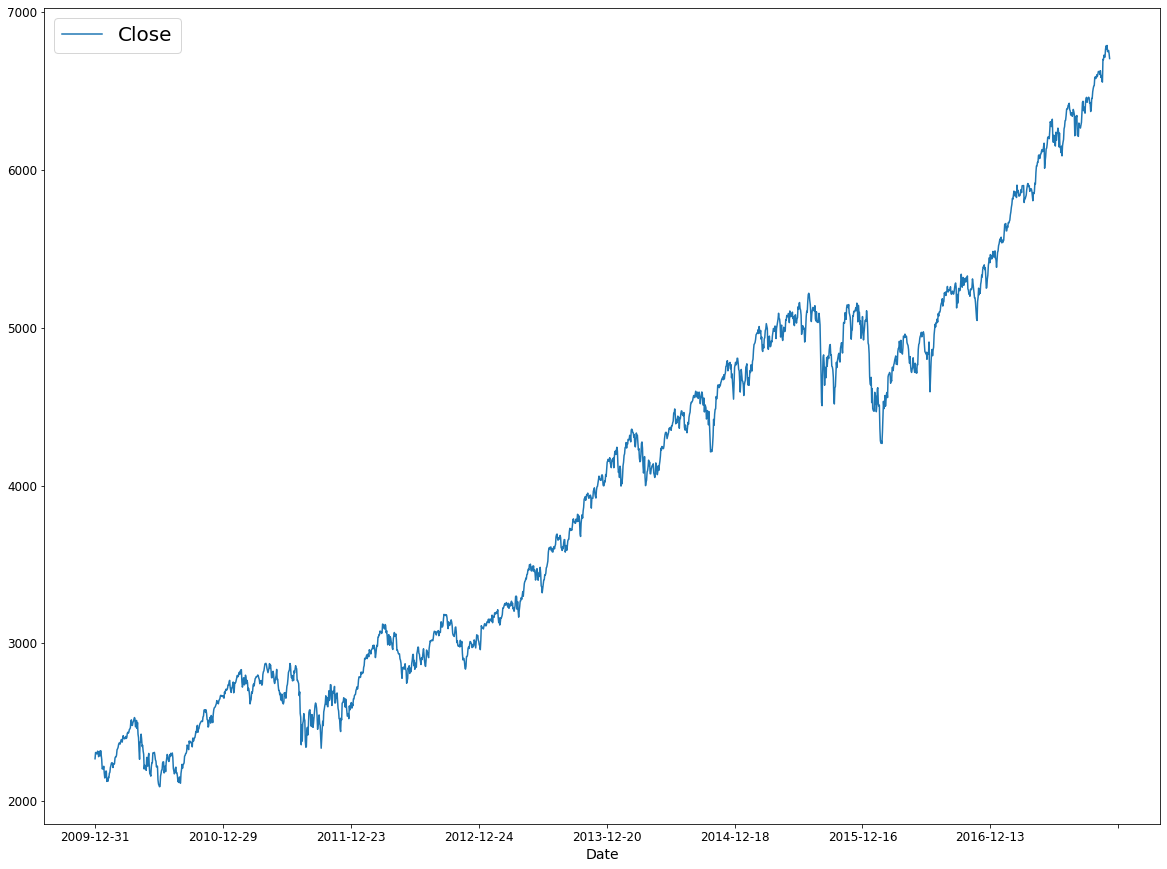

In [21]:
nasdaq_df.plot(x="Date", y="Close")

In [22]:
def series_to_supervised(data, n_in, dropnan=False):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t)
    cols.append(df.iloc[:][0] - df.shift(1).iloc[:][0])

    names += ['target']
  
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [23]:
dataset_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NASDAQ.csv?token=ANHXQQK4VPBE6ABSBCHTF5K74UP3W'
nasdaq_df = pd.read_csv(dataset_url)
# Dataset is now stored in a Pandas Dataframe
nasdaq_df.info()
nasdaq_df = nasdaq_df.drop(columns=['Date','Name'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1983 non-null   float64
 3   mom             1983 non-null   float64
 4   mom1            1982 non-null   float64
 5   mom2            1981 non-null   float64
 6   mom3            1980 non-null   float64
 7   ROC_5           1979 non-null   float64
 8   ROC_10          1974 non-null   float64
 9   ROC_15          1969 non-null   float64
 10  ROC_20          1964 non-null   float64
 11  EMA_10          1975 non-null   float64
 12  EMA_20          1965 non-null   float64
 13  EMA_50          1935 non-null   float64
 14  EMA_200         1785 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

In [24]:
data = series_to_supervised(nasdaq_df.values, 40)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Columns: 3281 entries, var1(t-40) to target
dtypes: float64(3281)
memory usage: 49.7 MB
